# MLP experiments on Confidence and Network Architecture
adaptation of work from Alex Meinke in *Towards Neural Networks that Provably Know When They Don't Know*

In [1]:
import models
import matplotlib
import matplotlib.pyplot as plt
from sklearn import mixture, preprocessing, datasets
import torch
import torch.nn as nn
import torch.utils.data as data_utils
import torch.nn.functional as F
import torch.optim as optim
import traintest as tt
from copy import deepcopy
import time
from IPython import display

import numpy as np
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Layer Depth
The paradigm is that more layers, create more linear pieces of the decision boundary. Creating a map can benefit from non linear mappings comprised of smaller linear components

### Data and Network Generator

In [2]:
moons_data, moons_label = datasets.make_moons(n_samples=1000, shuffle=True, noise=.15)

data = (torch.tensor(moons_data, device='cuda', dtype=torch.float32) + 1.6) / 4
label = torch.tensor(moons_label, dtype=torch.float)
label = label.type(torch.LongTensor)

train = data_utils.TensorDataset(data, label)
train_loader = data_utils.DataLoader(train, batch_size=250, shuffle=True)

In [7]:
device = 'cuda'
lr = 0.1
lr_gmm = 1e-3
decay = 5e-4

## Train Networks and Plot

### Vary Depth

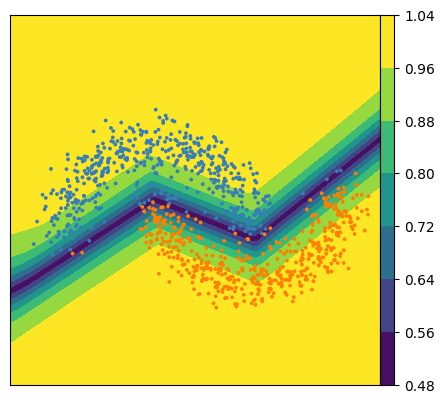

In [13]:
net = models.DxWMoonsNet(d=3)
param_groups = [{'params':net.parameters(),'lr':lr, 'weight_decay':decay}]
optimizer = optim.SGD(param_groups)
f, ax1 = plt.subplots(1, 1)
for epoch in range(1000):
    _,acc,_ = tt.train_plain(net.to(device), device, train_loader, optimizer, 
                epoch, verbose=-1)
    plt.suptitle(f'Training Epoch: {epoch}\nAccuracy: {acc}')
    tt.plot_conf(net, data, ax1, device);

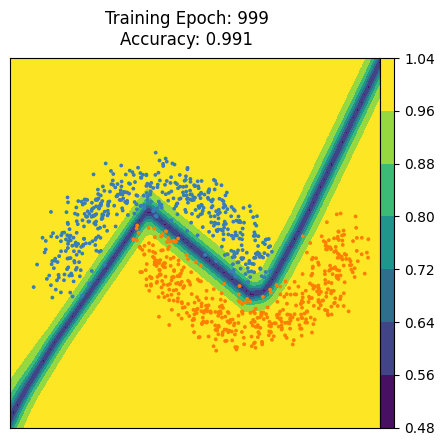

In [14]:
net = models.DxWMoonsNet(d=4)
param_groups = [{'params':net.parameters(),'lr':lr, 'weight_decay':decay}]
optimizer = optim.SGD(param_groups)
f, ax1 = plt.subplots(1, 1)
for epoch in range(1000):
    _,acc,_ = tt.train_plain(net.to(device), device, train_loader, optimizer, 
                epoch, verbose=-1)
    plt.suptitle(f'Training Epoch: {epoch}\nAccuracy: {acc}')
    tt.plot_conf(net, data, ax1, device);

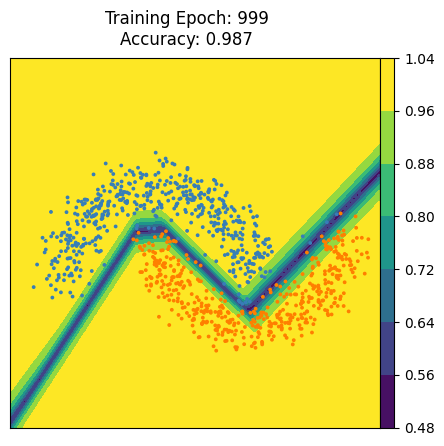

In [15]:
net = models.DxWMoonsNet(d=6)
param_groups = [{'params':net.parameters(),'lr':lr, 'weight_decay':decay}]
optimizer = optim.SGD(param_groups)
f, ax1 = plt.subplots(1, 1)
for epoch in range(1000):
    _,acc,_ = tt.train_plain(net.to(device), device, train_loader, optimizer, 
                epoch, verbose=-1)
    plt.suptitle(f'Training Epoch: {epoch}\nAccuracy: {acc}')
    tt.plot_conf(net, data, ax1, device);

### Results on Width

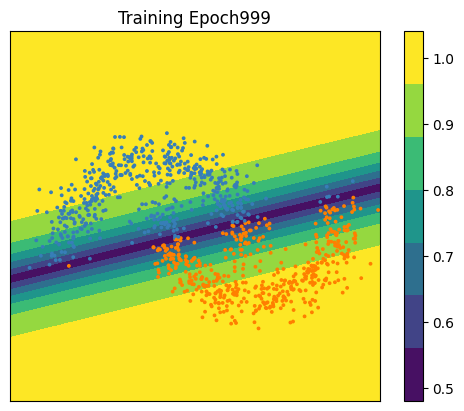

In [13]:
net = models.DxWMoonsNet(w=4)
param_groups = [{'params':net.parameters(),'lr':lr, 'weight_decay':decay}]
optimizer = optim.SGD(param_groups)
f, ax1 = plt.subplots(1, 1)
for epoch in range(1000):
    _,acc,_ = tt.train_plain(net.to(device), device, train_loader, optimizer, 
                epoch, verbose=-1)
    plt.suptitle(f'Training Epoch: {epoch}\nAccuracy: {acc}')
    tt.plot_conf(net, data, ax1, device);

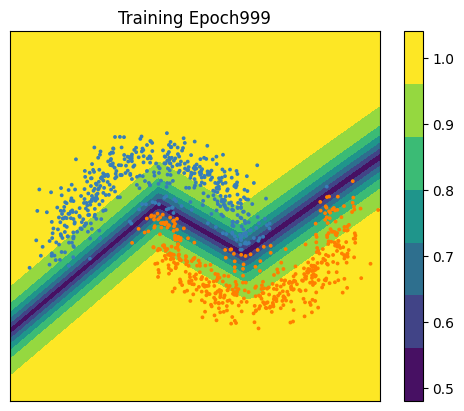

In [14]:
net = models.DxWMoonsNet(w=16)
param_groups = [{'params':net.parameters(),'lr':lr, 'weight_decay':decay}]
optimizer = optim.SGD(param_groups)
f, ax1 = plt.subplots(1, 1)
for epoch in range(1000):
    _,acc,_ = tt.train_plain(net.to(device), device, train_loader, optimizer, 
                epoch, verbose=-1)
    plt.suptitle(f'Training Epoch: {epoch}\nAccuracy: {acc}')
    tt.plot_conf(net, data, ax1, device);

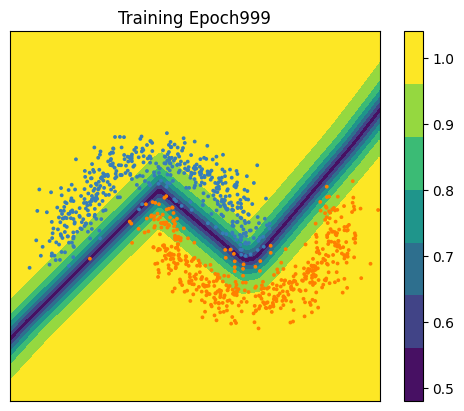

In [16]:
net = models.DxWMoonsNet(w=64)
param_groups = [{'params':net.parameters(),'lr':lr, 'weight_decay':decay}]
optimizer = optim.SGD(param_groups)
f, ax1 = plt.subplots(1, 1)
for epoch in range(1000):
    _,acc,_ = tt.train_plain(net.to(device), device, train_loader, optimizer, 
                epoch, verbose=-1)
    plt.suptitle(f'Training Epoch: {epoch}\nAccuracy: {acc}')
    tt.plot_conf(net, data, ax1, device);

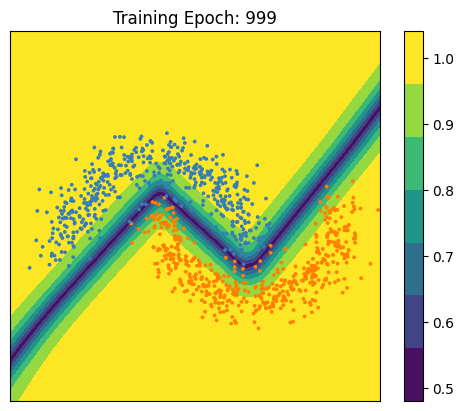

In [48]:
net = models.DxWMoonsNet(w=128)
param_groups = [{'params':net.parameters(),'lr':lr, 'weight_decay':decay}]
optimizer = optim.SGD(param_groups)
f, ax = plt.subplots(1, 1)
for epoch in range(1000):
    tt.train_plain(net.to(device), device, train_loader, optimizer, 
                epoch, verbose=-1)
    tt.plot_conf(net, data, epoch, f, device);

# Uncertainty Aware


In [8]:
# OOD noise for conditioning
data_out = torch.rand(1000, 2)
label_out = torch.zeros(1000)
label_out = label_out.type(torch.LongTensor)
train_out = data_utils.TensorDataset(data_out, label_out)
train_loader_out = data_utils.DataLoader(train_out, batch_size=250, shuffle=True)

In [9]:
gmm = models.GMM(50 ,2)
gmm.to(device)
gmm.find_solution(data.to(device),iterate=True)

C:\Users\samle\.conda\envs\CCU\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\samle\.conda\envs\CCU\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [10]:
gmm_out = models.GMM(50,2)
gmm_out.to(device)
gmm_out.find_solution(data_out.to(device), iterate=True)

C:\Users\samle\.conda\envs\CCU\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\samle\.conda\envs\CCU\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [18]:
model = models.DoublyRobustModel(deepcopy(net),
                                 deepcopy(gmm.to(device)),
                                 deepcopy(gmm_out.to(device)),
                                 0.,
                                 dim=2,
                                 classes=2).to(device)

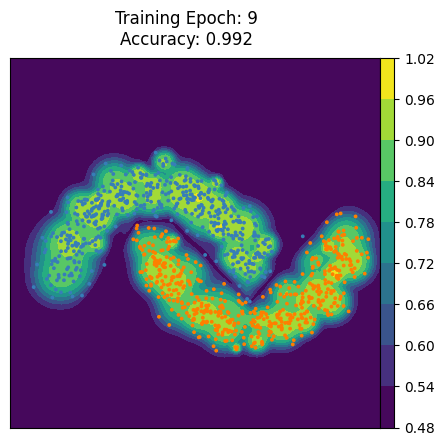

In [20]:
param_groups = [#{'params':model.mm.parameters(),'lr':lr_gmm, 'weight_decay':0.},
             #   {'params':model.mm_out.parameters(),'lr':lr_gmm, 'weight_decay':0.},
                {'params':model.base_model.parameters(),'lr':lr, 'weight_decay':decay}]

optimizer = optim.SGD(param_groups)
f, ax1 = plt.subplots(1, 1)
for epoch in range(10):
    _,acc,_ = tt.train_CEDA_gmm_out(model, device, train_loader, optimizer, 
                          epoch, verbose=-1, noise_loader=iter(train_loader_out))
    plt.suptitle(f'Training Epoch: {epoch}\nAccuracy: {acc}')
    tt.plot_conf(model, data, ax1, device);

In [23]:
model = models.DoublyRobustModel(models.DxWMoonsNet(d=4, w=64),
                                 deepcopy(gmm.to(device)),
                                 deepcopy(gmm_out.to(device)),
                                 0.,
                                 dim=2,
                                 classes=2).to(device)

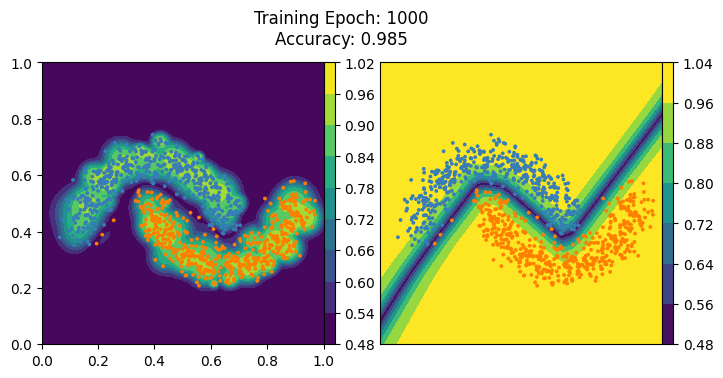

In [24]:
param_groups = [{'params':model.mm.parameters(),'lr':lr_gmm, 'weight_decay':0.},
             #   {'params':model.mm_out.parameters(),'lr':lr_gmm, 'weight_decay':0.},
                {'params':model.base_model.parameters(),'lr':lr, 'weight_decay':decay}]

optimizer = optim.SGD(param_groups)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
for epoch in range(1001):
    _,acc,_ = tt.train_CEDA_gmm_out(model, device, train_loader, optimizer, 
                          epoch, verbose=-1, noise_loader=iter(train_loader_out))
    plt.suptitle(f'Training Epoch: {epoch}\nAccuracy: {acc}')
    tt.plot_conf(model, data, ax1, device)
    tt.plot_conf(model.base_model, data, ax2, device);

## MultiClass Problems
New geometries of class boundaries show interesting behavior of conditioned Base Classifier

In [2]:
mc_data, mc_labels = datasets.make_classification(n_samples=1000,
                                                 n_features=2,
                                                 n_informative=2,
                                                 n_redundant=0,
                                                 n_classes=4,
                                                 n_clusters_per_class=1,
                                                 class_sep=1.8)

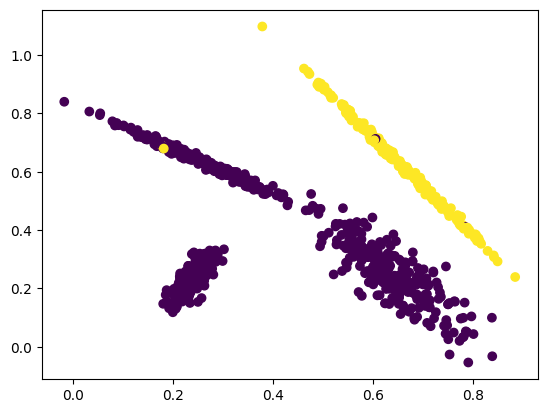

In [3]:
mc_data = torch.tensor((mc_data + 4) / 9).float()
#label for in/out
mc_io = np.zeros(len(mc_labels))
mc_io[mc_labels==3] = 1 
plt.scatter(mc_data[:,0],mc_data[:,1],c=mc_io);

In [4]:
# take last class as OOD
data_out = mc_data[mc_labels==3].float()
data = mc_data[mc_labels!=3].float()
mc_labels_in = mc_labels[mc_labels!=3]
mc_labels_out = mc_labels[mc_labels == 3]

In [5]:
label = torch.tensor(mc_labels_in, dtype=torch.float)
label = label.type(torch.LongTensor)
label_out = torch.tensor(mc_labels_out).type(torch.LongTensor)

train = data_utils.TensorDataset(data, label)
train_loader = data_utils.DataLoader(train, batch_size=250, shuffle=True)


train_out = data_utils.TensorDataset(data_out, label_out)
train_loader_out = data_utils.DataLoader(train_out, batch_size=250, shuffle=True)

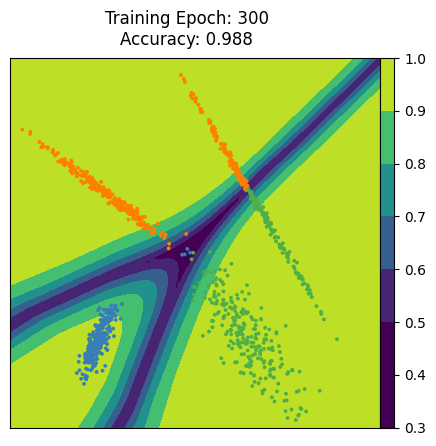

In [8]:
net = models.DxW_MClassNet(d=3, w=32, n_class=3)
param_groups = [{'params':net.parameters(),'lr':lr, 'weight_decay':decay}]
optimizer = optim.SGD(param_groups)
f, ax1 = plt.subplots(1, 1)
for epoch in range(301):
    _,acc,_ = tt.train_plain(net.to(device), device, train_loader, optimizer, 
                epoch, verbose=-1)
    plt.suptitle(f'Training Epoch: {epoch}\nAccuracy: {acc:.3f}')
    tt.plot_conf(net.to(device), mc_data, ax1, device);

In [9]:
gmm = models.GMM(50 ,2)
gmm.to(device)
gmm.find_solution(data.to(device),iterate=True)

C:\Users\samle\.conda\envs\CCU\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\samle\.conda\envs\CCU\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [10]:
gmm_out = models.GMM(50,2)
gmm_out.to(device)
gmm_out.find_solution(data_out.to(device), iterate=True)

C:\Users\samle\.conda\envs\CCU\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\samle\.conda\envs\CCU\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
model = models.DoublyRobustModel(models.DxW_MClassNet(d=6, w=32, n_class=3),
                                 deepcopy(gmm.to(device)),
                                 deepcopy(gmm_out.to(device)),
                                 0.,
                                 dim=2,
                                 classes=3).to(device)

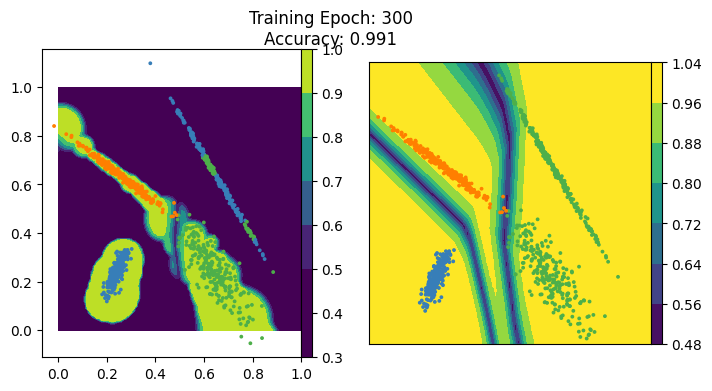

In [13]:
param_groups = [{'params':model.mm.parameters(),'lr':lr_gmm, 'weight_decay':0.},
             #   {'params':model.mm_out.parameters(),'lr':lr_gmm, 'weight_decay':0.},
                {'params':model.base_model.parameters(),'lr':lr, 'weight_decay':decay}]

optimizer = optim.SGD(param_groups)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
for epoch in range(301):
    _,acc,_ = tt.train_CEDA_gmm_out(model, device, train_loader, optimizer, 
                          epoch, verbose=-1, noise_loader=train_loader_out)
    plt.suptitle(f'Training Epoch: {epoch}\nAccuracy: {acc:.3f}')
    tt.plot_conf(model, mc_data, ax1, device)
    tt.plot_conf(model.base_model, mc_data, ax2, device);

In [17]:
1<<3

8